# SciPy

## Overview

* NumPy provides arrays and limited additional functionality


* SciPy builds on NumPy and provides additional modules:
  * Linear Algebra and wrappers to LAPACK & BLAS `scipy.linalg`
  * Numerical Integration `scipy.integrate` 
  * Interpolation `scipy.interpolate`
  * Optimisation `scipy.optimize` 
  * Special functions `scipy.special`
  * Signal processing `scipy.signal`
  * Image Processing `scipy.ndimage`
  * Fourier transforms `scipy.fftpack`
  * Statistical functions `stats` 
  * Spatial data structures and algorithms `scipy.spatial`
  * File I/O e.g. to read MATLAB files `scipy.io`
  <br>

## Useful links

- Note: no PDE solvers (though other packages exist) 

- Documentation:
  - <https://docs.scipy.org/doc/scipy/reference/index.html>
  - <http://scipy-cookbook.readthedocs.org>

## Linear algebra: `sicpy.linalg`

- Wider set of linear algebra operations than in Numpy 
  - various decompositions (eigen, singular value)
  - matrix exponentials, trigonometric functions
  - particular matrix equations and special matrics
  - low-level LAPACK and BLAS routines
- Routines also for sparse matrices
  - storage formats 
  - iterative algorithms

### Example: Matrix inverse

Consider:

$$
A = \left[ \begin{array}
{rrr}
1 & 3 & 5 \\
 2 & 5 & 1 \\
 2 & 3 & 8 \\
\end{array} \right]
$$

The inverse of $A$ is

$$
A^{-1} = 
\frac{1}{25} \left[ \begin{array}
{rrr}
-37 & 9 & 22\\
14 & 2 & -9 \\ 
4 & -3 & 1\\
\end{array} \right]
\approx
\left[ \begin{array}
{rrr}
-1.48 & 0.36 &  0.88\\
-0.56 &  0.08 & -0.36 \\ 
0.16 & -0.12 &  0.04\\
\end{array} \right]
$$

which may be confirmed by checking $A A^{-1} = I$ where $I$ is the identity.

See this [solution step by step](https://www.emathhelp.net/calculators/linear-algebra/inverse-of-matrix-calculator/?i=%5B%5B1%2C3%2C5%5D%2C%5B2%2C5%2C1%5D%2C%5B2%2C3%2C8%5D%5D&m=g)!

#### (a) Find inverse of matrix A (as defined above).

In [1]:
from scipy import linalg
import numpy as np

# Define the matrix using numpy
A = np.array([[1, 3, 5], [2, 5, 1], [2, 3, 8]])

# Find inverse using scipy.linalg.inv()
Ainv = linalg.inv(A)
print(Ainv)

[[-1.48  0.36  0.88]
 [ 0.56  0.08 -0.36]
 [ 0.16 -0.12  0.04]]


#### (b) Check the result by inverting the result, which should return the original matrix  $A$

Tip: you combine [`numpy.rint()`](https://numpy.org/devdocs/reference/generated/numpy.rint.html#numpy.rint) to round to the nearest integer
and [`numpy.astype(int)`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html) to transform the result into a integer matrix.

In [2]:
print(np.rint(linalg.inv(Ainv)).astype(int))

[[1 3 5]
 [2 5 1]
 [2 3 8]]


#### (c) Check the result by multiplying out  $A A^{-1}$ , which should give identity matrix  $I$

Were the identity matrix is:

$$
I = \left[ \begin{array}
{rrr}
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 1 \\
\end{array} \right]
$$

Tip: you combine `numpy.rint()` to round to the nearest integer
and `.astype(int)` to transform the result into a integer matrix.

In [3]:
print(np.rint(A.dot(Ainv)).astype(int))

[[1 0 0]
 [0 1 0]
 [0 0 1]]


## Example: Linear equation

[`scipy.linalg.solve()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html#scipy-linalg-solve)
solves the linear equation set `a @ x == b` for the unknown `x` for square a matrix.

Knowing that $A A^{-1} = I$, find the inverse $A^{-1}$ using the linear equation approach.

Tip: you can create an identity matrix using [numpy.identity()](https://numpy.org/doc/stable/reference/generated/numpy.identity.html#numpy-identity)

In [4]:
# define I:
I = np. identity(3, dtype=int)
print(I)

[[1 0 0]
 [0 1 0]
 [0 0 1]]


In [5]:
# Solving the linear equation
print(linalg.solve(A, I))

[[-1.48  0.36  0.88]
 [ 0.56  0.08 -0.36]
 [ 0.16 -0.12  0.04]]


## Integration: `scipy.integrate`

- Routines for numerical integration – single, double and triple integrals
- Can solve Ordinary Differential Equations (ODEs) with initial conditions

For example, we can use [`scipy.integrate.dblquad`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.dblquad.html)
to determine the result of a double integral like:

$$
\int _{a} ^{b}\ \int _{g(x)} ^{h(x)} f(x,y) \, dx \ dy
$$

by calling: `dblquad(func, a, b, gfun, hfun)`, where `gfun` and `hfun` can be digits or functions.

### Example : Double integral - digit boundary

Calculate the double integral

$$
\int_0^{\pi/2} dx \int_0^1 dy \quad f(x,y) = \int_0^{\pi/2} \int_0^1 f(x,y) \ dy \ dx 
$$

where $f(x,y) = y \sin(x)$. The answer should be 1/2.
<br>
<br>

In [6]:
# numerically integrate using dblquad()
from scipy.integrate import dblquad

# define the integrand >> arguments order is important!
def func(y, x):
    return y * np.sin(x)

# note that the result has two values: "The resultant integral" and "An estimate of the error"
print(dblquad(func, 0, np.pi/2, 0, 1))

(0.49999999999999994, 5.551115123125782e-15)


Sometimes is useful to use the `inline` function definition using `lambda`, see the same example:

In [7]:
# lambda arguments : expression
inline_func = lambda y, x: y * np.sin(x)
print(dblquad(inline_func, 0, np.pi/2, 0, 1))

# or in one line:
print(dblquad(lambda y, x: y * np.sin(x), 0, np.pi/2, 0, 1))

(0.49999999999999994, 5.551115123125782e-15)
(0.49999999999999994, 5.551115123125782e-15)


### Example: Double integral - function boundary

One way of testing this function is by calculating $\pi$ using the double integral for the area of a circle with radius $r$:

$$
\int _{-r} ^{r} \int _{-\sqrt(r^2-y^2)} ^{\sqrt(r^2-y^2)} 1 \, dx\, dy = \pi r^2
$$

We will solve this with [`scipy.integrate.dblquad()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.dblquad.html)

#### Solution 1: simplify by considering $r=1$

In [8]:
# define the integrand
def func(x, y):
    return 1

# define the lower boundary curve in x
def gfun(y):
    return -1*np.sqrt(1 - y*y)

# define the upper boundary curve in x
def hfun(y):
    return np.sqrt(1 - y*y)

my_pi = dblquad(func, -1, +1, gfun, hfun)
print(my_pi)

(3.1415926535897967, 2.000470900043183e-09)


#### Solution 2: generalise for any $r$ value

Tip: You will need call `gfun` and `hfun` using a `lambda` function, something like
`lambda y: gfun(y,r)`

In [9]:
# define the integrand
def func(x, y):
    return 1

# define the lower boundary curve in x
def gfun(y, r):
    return -1*np.sqrt(r*r - y*y)

# define the upper boundary curve in x
def hfun(y, r):
    return np.sqrt(r*r - y*y)

# define the area for a given radius - using dblquad
def get_area(r):
    (area, err) = dblquad(func, -r, +r, lambda y: gfun(y,r), lambda y: hfun(y,r))
    return area

# get the pi value for a given area/radius:
def get_pi(r):
    area = get_area(r)
    pi = area / r / r
    return pi

my_pi = get_pi(10)
my_pi

3.1415926535897967

#### PI: Check result

Compare the integrated `pi` value with the standard `numpy.pi`

In [10]:
# compare with numpy pi
diff = abs(np.pi - get_pi(4841))

# print with scientific notation
print(diff)

# suppress the scientific notation
print('{:.20f}'.format(diff))


6.661338147750939e-15
0.00000000000000666134


## Ordinary Differential Equations: `sicpy.odeint`

Solve Ordinary Differential Equations (ODEs) with initial conditions.

### Example: Pendulum

Considerer a point mass, $m$, is attached to the end of a massless rigid rod of length $l$.
The pendulum is acted on by gravity and friction.
We can describe the resulting motion of the pendulum by angle, $\theta$, it makes with the vertical. 

<img src="pendulum.png" style="width: 30%">

Assuming angle $\theta$ always remains small, we can write a second-order differential equation to describe the motion of the mass according to Newton's 2nd law of motion, $m\,a = F$, in terms of $\theta$:

$$
\ddot{\theta} + \frac{b}{m}\,\dot\theta + \frac{g}{l}\,\theta = 0
$$

where $b$ is the friction coefficient and $b \ll g$.


To use `odeint`, we rewrite the above equation as 2 first-order differential equations:

$
\dot{\theta} = \omega
$

$
\dot{\omega}= -\frac{g}{l}\,\theta - \frac{b}{m}\,\omega
$

#### Pendulum: Defining values

Set up parameters and initial values.

In [11]:
# Parameters and initial values
g = 9.81                # gravitational constant
l = 1.0                 # length of pendulum
m = 1.0                 # mass of the ball
b = 0.2                 # friction coefficient
theta0 = np.radians(10) # initial angle
w0 = 0.0                # initial omega

# create a vector with the initial angle and initial omega
y0 = [theta0, w0]

# time interval
time_init = 0 # total number of seconds
time_end = 10 # total number of seconds
steps = 101   # number of points interval

t = np.linspace(time_init, time_end, steps)

#### Pendulum: Defining ODE

Define the ODE as a function.

In [12]:
# define ODEs as a function
def pend(y, t, b, m, g, l):
    '''y = [theta, omega] '''
    theta, omega = y
    odes = [omega, - (g/l*theta) - (b/m*omega)]
    return odes

#### Pendulum: Solving ODE

Define the ODE as a function.

Use `odeint` to numerically solve the ODE with initial conditions.

In [13]:
from scipy.integrate import odeint

# get solution. Note args are given as a tuple
solution = odeint(pend, y0, t, args=(b,m,g,l))


#### Pendulum: Exact solution & Plotting

The ODE can be solved analytically. The exact solutions for $\theta$ and $\omega$ are:

In [14]:
# Exact solution for theta
def thetaExact(t, theta0, b, m, g, l):
    root = np.sqrt( np.abs( (b*b)-4*g*m*m/l ) )
    sol = theta0*np.exp(-b*t/2)*( np.cos( root*t/2 ) + (b/root)*np.sin( root*t/2) )
    return sol

# Exact solution for omega
def omegaExact(t, theta0, b, m, g, l):
    root = np.sqrt( np.abs( (b*b)-4*g*m*m/l ) )
    sol = -(b/2)*theta0*np.exp(-b*t/2)*( np.cos( root*t/2 ) + (b/root)*np.sin( root*t/2) ) + (theta0/2)*np.exp(-b*t/2)*( b*np.cos( root*t/2 ) - root*np.sin( root*t/2) )
    return sol

To see how good the numerical solutions for $\theta$ and $\omega$ are, plot the exact solutions against the
numerical solutions for the appropriate range of $t$.

You should include a legend to label the different lines/points.

You should find that the numerical solution looks quite good. Can you adjust the parameters above
(re-execute all the relevant cells) to make it worse?

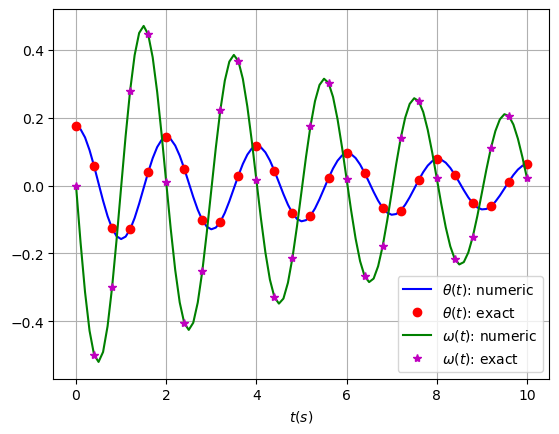

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

# plot theta
plt.plot(t, solution[:, 0], 'b', label=r'$\theta(t)$: numeric')
plt.plot(t[0::4], thetaExact(t[0::4],theta0,b,m,g,l), 'ro', label=r'$\theta(t)$: exact')

#plot omega
plt.plot(t, solution[:, 1], 'g', label=r'$\omega(t)$: numeric')
plt.plot(t[0::4], omegaExact(t[0::4],theta0,b,m,g,l), 'm*', label=r'$\omega(t)$: exact')

plt.legend(loc='best')
plt.xlabel(r'$t(s)$')
plt.grid()


## Optimisation: `scipy.optimize.leastsq`

- Scipy has Several classical optimisation algorithms
  - Least squares fitting
  - Quasi-Newton type optimisations
  - Simulated annealing
  - General purpose root finding

Here, we are going to use `scipy.optimize.leastsq` to fit some measured data, $\{x_i,\,y_i\}$, to a function.

### Example: sin function

Consider the following function

$$
y\,=\,A\,\sin(2\pi k x \,+\, \theta)
$$

where the parameters $A$, $k$, and $\theta$ are unknown.

The residual vector, that will be squared and summed by `leastsq` to fit the data, is:

$$
e_i\,=\, ∣∣ \, y_i \,− \,A\sin(2\pi k x_i + \theta)∣∣
$$

By defining a function to compute the residuals, $e_i$, and, selecting appropriate starting values, `leastsq` can be used to find the best-fit parameters $\hat{A}$, $\hat{k}$, $\hat{\theta}$.

#### Defining initial values

Create a sample of "true values", and the "measured" (noisy) data. Define the residual function and initial values.

In [16]:
# define the initial values
A = 10
k = 1.0 / 3e-2
theta = np.pi / 6

# define x array
points = 30
x_ini = 0
x_end = 0.06
dx = x_end/points
x = np.arange(x_ini, x_end, dx)

# parameters vector:
p = [A, k, theta]

# gessing values of the parameter vector
p0 = [8, 1 / 2.3e-2, np.pi / 3]

#### Function definitions

For easy evaluation of the model function parameters y=[A, K, theta], we define two functions:

In [17]:
# def main function
def func(x, p):
    '''p = [A, k, theta]'''
    return p[0] * np.sin(2.0*np.pi*p[1]*x + p[2])

In [18]:
# Function to compute the residual
def residuals(p, measure, x):
    err = measure - func(x, p)
    return err

#### Experimental data

Create an experimental data by calculating the exact solution, and then, adding a noise to it.

In [19]:
# define noise measured data >> tip: use random number to add noise
y_noise = func(x, p) + 2.0*np.random.randn(len(x))

#### Parameter estimation

Do least squares fitting and print the parameter estimation

In [20]:
# least squares fitting
from scipy.optimize import leastsq

fitting = leastsq(residuals, p0, args=(y_noise, x))

# Print estimated and exact parameters
print("Estimated: ",fitting[0])
print("Exact: ",np.array(p))

Estimated:  [-10.39814001  33.76839002   3.55768998]
Exact:  [10.         33.33333333  0.52359878]


#### Looking the results

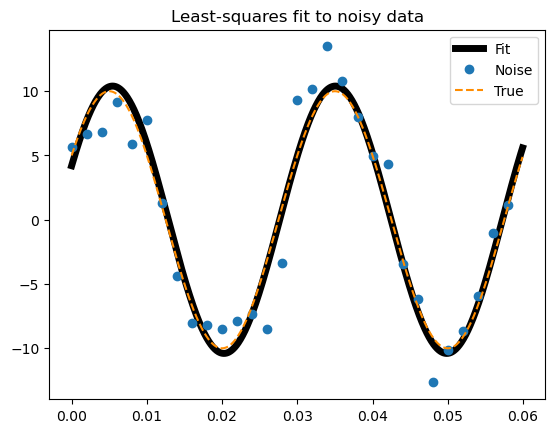

In [21]:
# New x-vector to better plotting
x2 = np.arange(x_ini, x_end, x_end/1000)

plt.plot(x2, func(x2, fitting[0]), lw=5, c='k', label ='Fit')
plt.plot(x, y_noise, 'o', label ='Noise')
plt.plot(x2, func(x2, p), '--', color="darkorange", label ='True')

plt.title('Least-squares fit to noisy data')
plt.legend()
plt.show()

## Summary

- As we have seen, SciPy has a wide range of useful functionality for scientific computing.
- In case it does not have what you need, there are other packages with specialised functionality.

#### Other packages

- `Pandas`: Offers R-like statistical analysis of numerical tables and time series
- `SymPy`: Python library for symbolic computing
- `scikit-image`: Advanced image processing
- `scikit-learn`: Package for machine learning  
- `Sage`: Open source replacement for Mathematica / Maple / Matlab (built using Python)

